In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Let's construct the dataframe for loan borrowers
borrower ="Ritch","Lisa","Fred","Gregor","Esther","Willis","Margt","Phylis","Naomi","Douglas"
amount = 234.9,672.5,246.3,893.2,748.7,254.7,758.8,375.7,346.7,234.9
salary = 201.67,234.88,235.23,642.56,476.56,233.45,453.67,362.12,234.45,345.56
data = pd.DataFrame({"borrower":borrower,"amount":amount,"salary":salary})
data

,borrower,amount,salary
0,Ritch,234.9,201.67
1,Lisa,672.5,234.88
2,Fred,246.3,235.23
3,Gregor,893.2,642.56
4,Esther,748.7,476.56
5,Willis,254.7,233.45
6,Margt,758.8,453.67
7,Phylis,375.7,362.12
8,Naomi,346.7,234.45
9,Douglas,234.9,345.56


In [3]:
#Let's find the length of the borrowers strings
data["Names_Length"] = data.borrower.apply(len)
data.loc[0:5,['borrower',"Names_Length"]]

,borrower,Names_Length
0,Ritch,5
1,Lisa,4
2,Fred,4
3,Gregor,6
4,Esther,6
5,Willis,6


In [4]:
data["ceil_amount"] = data.amount.apply(np.ceil)
data.loc[0:5,['amount',"ceil_amount"]]

,amount,ceil_amount
0,234.9,235.0
1,672.5,673.0
2,246.3,247.0
3,893.2,894.0
4,748.7,749.0
5,254.7,255.0


In [5]:
#floor the salary values
data["floor_salary"] = data.salary.apply(np.floor)
data.loc[0:5,['salary',"floor_salary"]]

,salary,floor_salary
0,201.67,201.0
1,234.88,234.0
2,235.23,235.0
3,642.56,642.0
4,476.56,476.0
5,233.45,233.0


In [6]:
#Finding the maximum values of all rows of columns
data.loc[:,["salary","amount"]].apply(max,axis =1)

0    234.90
1    672.50
2    246.30
3    893.20
4    748.70
5    254.70
6    758.80
7    375.70
8    346.70
9    345.56
dtype: float64

In [7]:
#Returning the maximum values of columns
data.loc[:,["salary","amount"]].apply(max,axis =0)

salary    642.56
amount    893.20
dtype: float64

In [8]:
#Returns indices of the columns with the max elements
data.loc[:,["salary","amount"]].apply(np.argmax,axis =0)

salary    3
amount    3
dtype: int64

In [9]:
#Import the dataset

def collect(file):
    df= pd.read_csv(file)   
    return df
df = collect(r"C:\Users\kelvin\OneDrive\Desktop\iriswqa.csv")
print(df.shape)
df.sample(10)

(190, 5)


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
19,5.1,3.8,1.5,0.3,setosa
36,5.5,3.5,1.3,0.2,setosa
137,6.4,3.1,5.5,1.8,virginica
74,6.4,2.9,4.3,1.3,versicolor
50,7.0,3.2,4.7,1.4,versicolor
95,5.7,3.0,4.2,1.2,versicolor
141,6.9,3.1,5.1,2.3,virginica
5,5.4,3.9,1.7,0.4,setosa
38,4.4,3.0,1.3,0.2,setosa
17,5.1,3.5,1.4,0.3,setosa


In [10]:
#function to sum all values of the rows,columnwise
def calc_sum(x):
    return x.sum()
df.select_dtypes(float).apply(calc_sum,axis=0)

Sepal_Length    1094.9
Sepal_Width      590.5
Petal_Length     666.9
Petal_Width      208.3
dtype: float64

In [11]:
##function to sum all values of the columns,rowwise
def calc_sum1(f):
    return f.sum()
df.select_dtypes(float).apply(calc_sum1,axis =1)

0      10.2
1       9.5
2       9.4
3       9.4
4      10.2
       ... 
185    15.7
186    17.8
187    18.2
188    15.6
189    15.8
Length: 190, dtype: float64

In [12]:
#Proportion of each and every  sepal width
def round_val(h):
    return np.round((h/sum(df.Sepal_Width))*100,4)
df["Sepal_Width"].apply(round_val)

0      0.5927
1      0.5080
2      0.5419
3      0.5250
4      0.6097
        ...  
185    0.4572
186    0.5588
187    0.5419
188    0.4742
189    0.5080
Name: Sepal_Width, Length: 190, dtype: float64

In [13]:
#Difference of the values between min and max in all floating columns
def cal_diff(fs):
    return np.max(fs) - np.min(fs)
df.select_dtypes(float).apply(cal_diff,axis=0)

Sepal_Length    3.6
Sepal_Width     2.4
Petal_Length    5.9
Petal_Width     2.4
dtype: float64

In [14]:
def cal_diff(fs):
    return fs[0] - fs[1]
df["SepaLSepWdiff"]= df[["Sepal_Length","Sepal_Width"]].apply(cal_diff,axis=1)
df.loc[0:10,["Sepal_Length","Sepal_Width","SepaLSepWdiff"]]

,Sepal_Length,Sepal_Width,SepaLSepWdiff
0,5.1,3.5,1.6
1,4.9,3.0,1.9
2,4.7,3.2,1.5
3,4.6,3.1,1.5
4,5.0,3.6,1.4
5,5.4,3.9,1.5
6,4.6,3.4,1.2
7,5.0,3.4,1.6
8,4.4,2.9,1.5
9,4.9,3.1,1.8


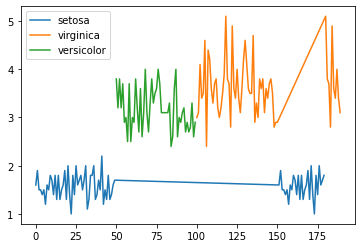

In [15]:
plt.plot(df[ df["Species"]=="setosa"].SepaLSepWdiff,label="setosa")
plt.plot(df[ df["Species"]=="virginica"].SepaLSepWdiff,label="virginica")
plt.plot(df[ df["Species"]=="versicolor"].SepaLSepWdiff,label= "versicolor")
plt.legend()
plt.show();

In [16]:
height = 173,168,171,168,171,167,173,167
weight = 60,70,67,77,83,67,59,56
df2= pd.DataFrame({"height":height,"weight":weight})
df2

,height,weight
0,173,60
1,168,70
2,171,67
3,168,77
4,171,83
5,167,67
6,173,59
7,167,56


In [17]:
def calc_bmi(weight,height):
    return np.round(weight/(height/100)**2,2)
df2.apply(lambda x:calc_bmi(x['weight'],x['height']),axis=1)

0    20.05
1    24.80
2    22.91
3    27.28
4    28.38
5    24.02
6    19.71
7    20.08
dtype: float64

In [18]:
def calc_bmi(weight,height):
    return np.round(weight/(height/100)**2,2)
df2["bmi"]=df2.apply(lambda x:calc_bmi(x['weight'],x['height']),axis=1)
df2

,height,weight,bmi
0,173,60,20.05
1,168,70,24.80
2,171,67,22.91
3,168,77,27.28
4,171,83,28.38
5,167,67,24.02
6,173,59,19.71
7,167,56,20.08


In [19]:
def indicator (bmi):
    if(bmi < 18.5):
        return 'Group 1'
    elif (18.5 <= bmi <25):
        return 'Group 2'
    elif (25 <= bmi < 30):
        return 'Group 3'
    else:
        return 'Group 2'
df2['bmi_indicator'] = df2['bmi'].apply(indicator)  
df2

,height,weight,bmi,bmi_indicator
0,173,60,20.05,Group 2
1,168,70,24.80,Group 2
2,171,67,22.91,Group 2
3,168,77,27.28,Group 3
4,171,83,28.38,Group 3
5,167,67,24.02,Group 2
6,173,59,19.71,Group 2
7,167,56,20.08,Group 2


In [20]:
#proportion of of those with heigh difference greater than 5
mask = df2['height'].apply(lambda x: df2.height- x > 5)
mask[0].value_counts(normalize=True)

False    0.75
True     0.25
Name: 0, dtype: float64

In [21]:
#condition selection with user defined function
def indicator (bmi):
    if(bmi < 18.5):
        return 'Group 1'
    elif (18.5 <= bmi <25):
        return 'Group 2'
    elif (25 <= bmi < 30):
        return 'Group 3'
    else:
        return 'Group 2'
df2['bmi_indicator'] = df2['bmi'].apply(indicator)  
df2

,height,weight,bmi,bmi_indicator
0,173,60,20.05,Group 2
1,168,70,24.80,Group 2
2,171,67,22.91,Group 2
3,168,77,27.28,Group 3
4,171,83,28.38,Group 3
5,167,67,24.02,Group 2
6,173,59,19.71,Group 2
7,167,56,20.08,Group 2


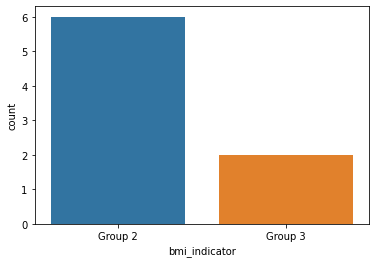

In [22]:
sns.countplot(x=df2["bmi_indicator"]);

In [23]:
#conditioning values of the multiple columns

df2[df2.apply(lambda x: True if x["bmi"]>24 and  x['height'] > 165 else False, axis=1)]

,height,weight,bmi,bmi_indicator
1,168,70,24.80,Group 2
3,168,77,27.28,Group 3
4,171,83,28.38,Group 3
5,167,67,24.02,Group 2


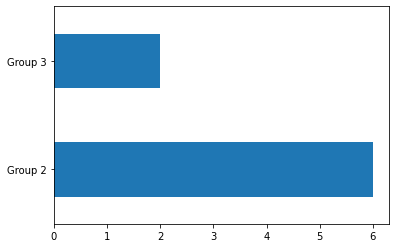

In [24]:
#comparison of groups
df2['bmi_indicator'].value_counts().plot(kind="barh");